<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


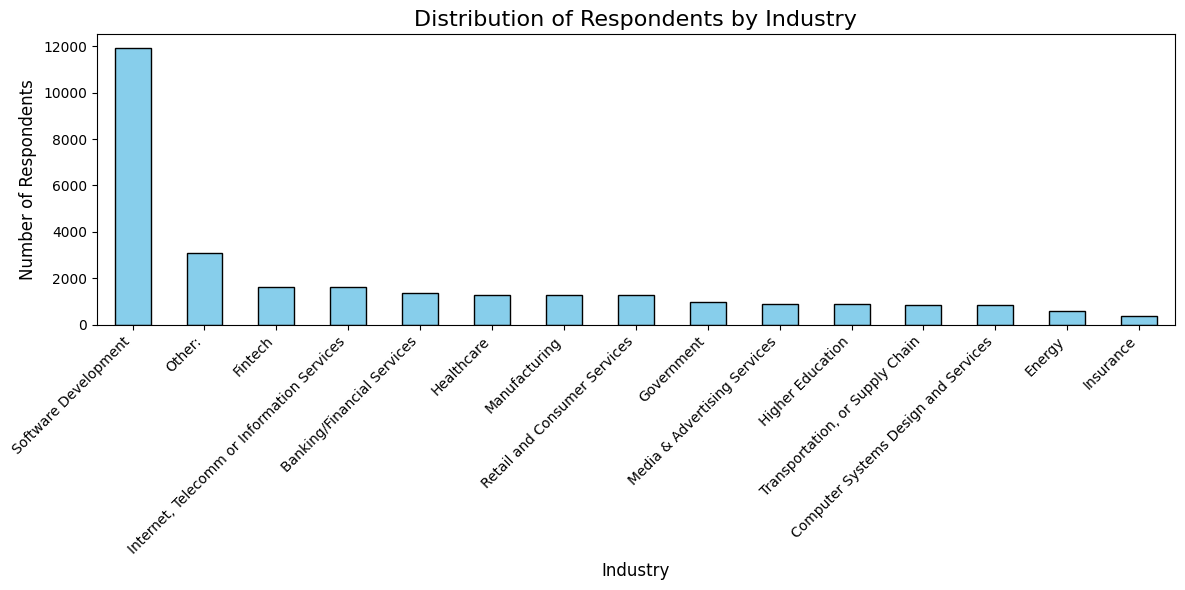

In [3]:
# Check if the 'Industry' column exists
if 'Industry' in df.columns:
    # Count the number of respondents in each industry
    industry_counts = df['Industry'].value_counts()

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Respondents by Industry', fontsize=16)
    plt.xlabel('Industry', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Industry' column is not available in the dataset.")

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Check if the 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' in df.columns:
    # Convert the column to numeric and drop missing values
    comp_yearly = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

    # Calculate basic statistics
    mean_comp = comp_yearly.mean()
    median_comp = comp_yearly.median()
    std_comp = comp_yearly.std()

    # Define the threshold for identifying outliers (3 standard deviations above the mean)
    outlier_threshold = mean_comp + 3 * std_comp

    # Identify outliers
    outliers = comp_yearly[comp_yearly > outlier_threshold]

    # Display the results
    print(f"Mean Yearly Compensation: {mean_comp:.2f}")
    print(f"Median Yearly Compensation: {median_comp:.2f}")
    print(f"Standard Deviation of Yearly Compensation: {std_comp:.2f}")
    print(f"Outlier Threshold: {outlier_threshold:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print("Outliers (Top 10):")
    print(outliers.head(10))

else:
    print("The 'ConvertedCompYearly' column is not available in the dataset.")

Mean Yearly Compensation: 86155.29
Median Yearly Compensation: 65000.00
Standard Deviation of Yearly Compensation: 186756.97
Outlier Threshold: 646426.21
Number of Outliers: 89
Outliers (Top 10):
529      650000.0
828     1000000.0
1932     945000.0
2171     750000.0
2187    2000000.0
2316    1000000.0
2592     800000.0
3024    1302817.0
5934    1031099.0
6735     650000.0
Name: ConvertedCompYearly, dtype: float64


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th Percentile): 32712.00
Q3 (75th Percentile): 107971.50
IQR (Interquartile Range): 75259.50
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978


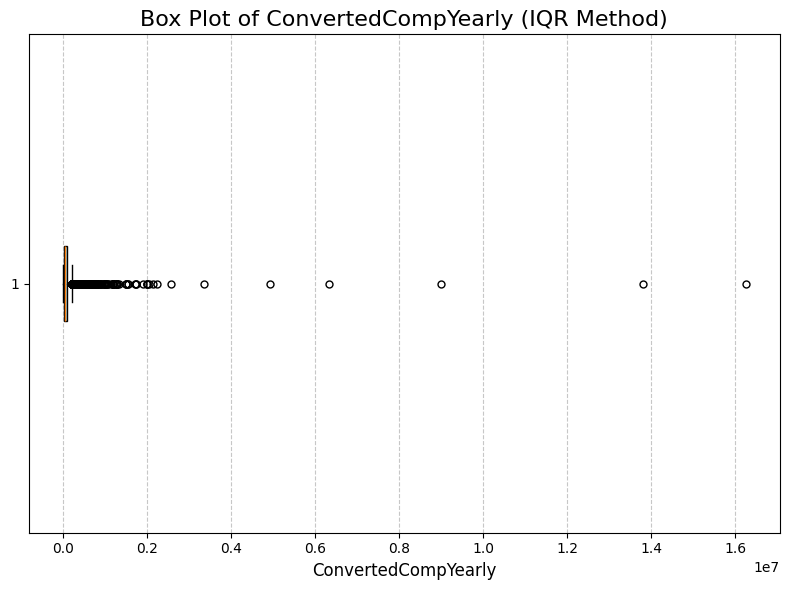

In [5]:
##Write your code here
# Check if the 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' in df.columns:
    # Convert the column to numeric and drop missing values
    comp_yearly = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

    # Calculate the IQR
    Q1 = comp_yearly.quantile(0.25)  # 25th percentile
    Q3 = comp_yearly.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = comp_yearly[(comp_yearly < lower_bound) | (comp_yearly > upper_bound)]

    # Display the results
    print(f"Q1 (25th Percentile): {Q1:.2f}")
    print(f"Q3 (75th Percentile): {Q3:.2f}")
    print(f"IQR (Interquartile Range): {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")

    # Visualize outliers using a box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(comp_yearly, vert=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                flierprops=dict(marker='o', color='red', markersize=5))
    plt.title('Box Plot of ConvertedCompYearly (IQR Method)', fontsize=16)
    plt.xlabel('ConvertedCompYearly', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The 'ConvertedCompYearly' column is not available in the dataset.")

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Check if the 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' in df.columns:
    # Convert the column to numeric and drop missing values
    comp_yearly = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

    # Calculate the IQR
    Q1 = comp_yearly.quantile(0.25)  # 25th percentile
    Q3 = comp_yearly.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers and create a new DataFrame
    df_cleaned = df[(comp_yearly >= lower_bound) & (comp_yearly <= upper_bound)]

    # Validate the size of the new DataFrame
    print(f"Original DataFrame size: {df.shape}")
    print(f"New DataFrame size (after removing outliers): {df_cleaned.shape}")
else:
    print("The 'ConvertedCompYearly' column is not available in the dataset.")

Original DataFrame size: (65437, 114)
New DataFrame size (after removing outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


/tmp/ipykernel_1332/3438038306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_Transformed'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')


Correlation Matrix:
                     ResponseId  CompTotal   WorkExp  JobSatPoints_1  \
ResponseId             1.000000  -0.014098 -0.039416        0.014194   
CompTotal             -0.014098   1.000000 -0.018013        0.017761   
WorkExp               -0.039416  -0.018013  1.000000       -0.032388   
JobSatPoints_1         0.014194   0.017761 -0.032388        1.000000   
JobSatPoints_4         0.002130   0.004478 -0.057005        0.430698   
JobSatPoints_5         0.007478   0.025861 -0.094126        0.634049   
JobSatPoints_6         0.008950   0.011577 -0.063702        0.617106   
JobSatPoints_7         0.020057   0.022383 -0.097756        0.600079   
JobSatPoints_8         0.004989   0.010580 -0.047072        0.623773   
JobSatPoints_9         0.022193   0.007242 -0.088181        0.597856   
JobSatPoints_10        0.011755   0.011561 -0.105905        0.586337   
JobSatPoints_11        0.011030   0.018388 -0.101986        0.613106   
ConvertedCompYearly   -0.012948   0.030847  

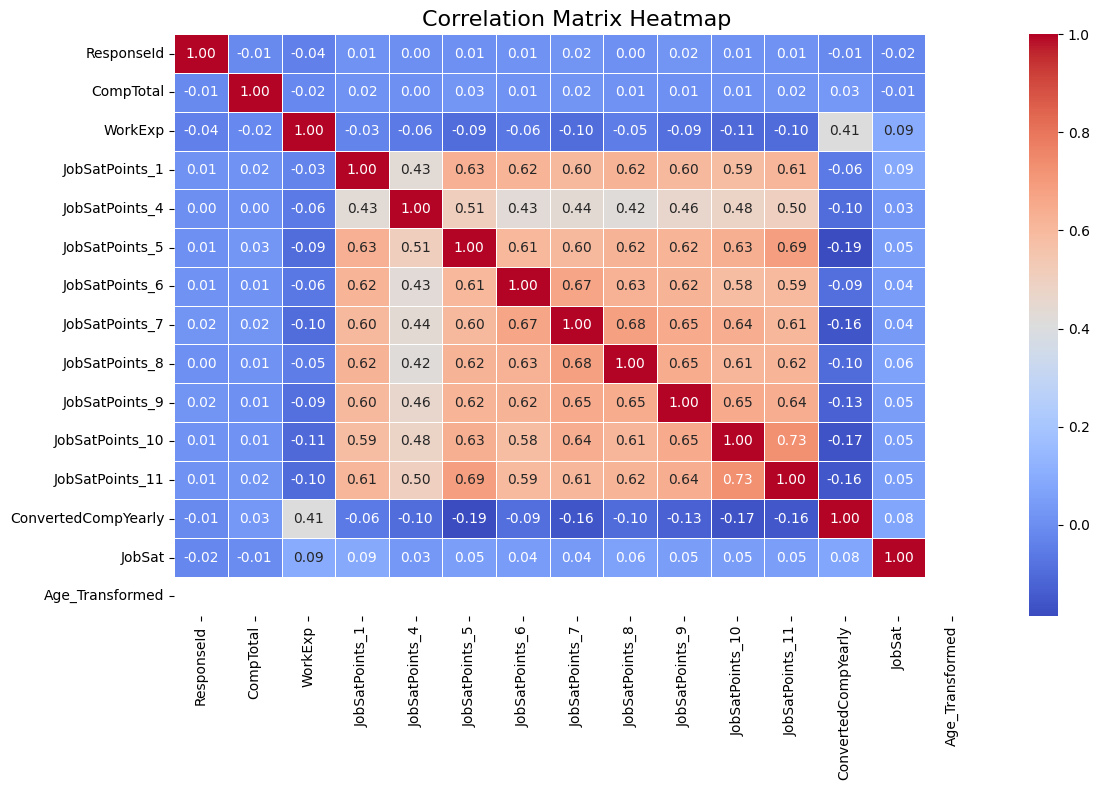

In [7]:
##Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Correlation Analysis

# Check if the 'Age' column exists
if 'Age' in df_cleaned.columns:
    # Map the Age column to approximate numeric values
    df_cleaned['Age_Transformed'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

    # Select numeric columns for correlation analysis
    numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    correlation_matrix = numeric_columns.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Age' column is not available in the cleaned dataset.")

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
